## Logistic regression for Machine Learning
Author: *Anish Mahapatra*

Email id: *anishmahapatra01@gmail.com*, LinkedIn: [https://www.linkedin.com/in/anishmahapatra/](https://www.linkedin.com/in/anishmahapatra/)

Welcome to this notebook, where we will be exploring logisti regression for machine learning. 

Now, this notebook is being written specifically to help you understand the fundamentals of logisitic regression, just enough to get you through an interview. Every dataset and application is unique, an the best way to learn Data Science is to simply **do it!**

**Aim**: To be able to understand the steps and flow of logistic regression. 

<a id='TOC'></a>
### Table of Contents

1. [Data Understanding](#1)
2. [Exploratory Data Analysis](#2)
3. [Visualize the data](#3)
4. [Test-Train Split](#4)
5. [Feature Scaling & Normalization](#5)
6. [Model Building](#6)
7. [Evaluation of Model](#7)

<a id='1'></a>
### 1. Data Understanding
The dataset that we will be using to perform logistic regression on is the Australia rain dataset to identify if it will rain or not tomorrow in Australia ([Source](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package))

**Dataset**: This dataset has 10 years of daily weather observations from numerous Australian weather stations.

RainTomorrow is the target variable to predict. It means, "Did it rain the next day, Yes or No"? <br/>
This column is Yes if the rain for that day was 1mm or more.

Nomenclature for variables followed: [camelCase](https://en.wikipedia.org/wiki/Camel_case)

In [1]:
# Importing the required packages
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

# Removing the minimum display columns to 500
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

##### Functions used

In [2]:
# Filling in the missing value for int and float with median
def replace_numerical(rain_df):
    for col in rain_df.select_dtypes(['int', 'float']):
        rain_df[col] = rain_df[col].fillna(rain_df[col].median())
    return rain_df

# Filling in the categorical values with mode
def replace_object(rain_df):
    for col in rain_df.select_dtypes('object'):
        rain_df[col] = rain_df[col].fillna(method='ffill')
    return rain_df

In [143]:
# Reading the .csv file from the input folder
ausRain = pd.read_csv('Input/weatherAUS.csv')

In [4]:
# Let's look at the data - 
# we shall make a copy of the data and then use the variable 'df' to work through the rest of the dataset
df = ausRain.copy(deep = True)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Data Description:

- Date - The date of observation
- Location - The common name of the location of the weather station
- MinTemp - The minimum temperature in degrees celsius
- MaxTemp - The maximum temperature in degrees celsius
- Rainfall - The amount of rainfall recorded for the day in mm
- Evaporation - The so-called Class A pan evaporation (mm) in the 24 hours to 9am
- Sunshine - The number of hours of bright sunshine in the day.
- WindGustDir - The direction of the strongest wind gust in the 24 hours to midnight
- WindGustSpeed - The speed (km/h) of the strongest wind gust in the 24 hours to midnight
- WindDir9am - Direction of the wind at 9am
- WindDir3pm - Direction of the wind at 3pm
- WindSpeed9am - Wind speed (km/hr) averaged over 10 minutes prior to 9am
- WindSpeed3pm - Wind speed (km/hr) averaged over 10 minutes prior to 3pm
- Humidity9am - Humidity (percent) at 9am
- Humidity3pm - Humidity (percent) at 3pm
- Pressure9am - Atmospheric pressure (hpa) reduced to mean sea level at 9am
- Pressure3pm - Atmospheric pressure (hpa) reduced to mean sea level at 3pm
- Cloud9am - Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast.
- Cloud3pm - Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values
- Temp9am - Temperature (degrees C) at 9am
- Temp3pm - Temperature (degrees C) at 3pm
- RainToday - Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
- RainTomorrow - The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk".


In [5]:
# Viewing the shape of the data - (rows, columns)
df.shape

(145460, 23)

This indicated that we have 145,460 rows and 23 columns

In [6]:
# Summary of the dataset
print(df.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
Date             145460 non-null object
Location         145460 non-null object
MinTemp          143975 non-null float64
MaxTemp          144199 non-null float64
Rainfall         142199 non-null float64
Evaporation      82670 non-null float64
Sunshine         75625 non-null float64
WindGustDir      135134 non-null object
WindGustSpeed    135197 non-null float64
WindDir9am       134894 non-null object
WindDir3pm       141232 non-null object
WindSpeed9am     143693 non-null float64
WindSpeed3pm     142398 non-null float64
Humidity9am      142806 non-null float64
Humidity3pm      140953 non-null float64
Pressure9am      130395 non-null float64
Pressure3pm      130432 non-null float64
Cloud9am         89572 non-null float64
Cloud3pm         86102 non-null float64
Temp9am          143693 non-null float64
Temp3pm          141851 non-null float64
RainToday        142199 non-null obje

In [7]:
# Printing all the columns with atleast one null value
df.columns[df.isna().any()].tolist()

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow']

In [8]:
print("The number of columns with atleast one NULL value(s) are: ", len(df.columns[df.isna().any()].tolist()))

The number of columns with atleast one NULL value(s) are:  21


<a id='2'></a>
## 2. Exploratory Data Analysis
Back to [Table of Contents](#TOC)

In [9]:
# Making a copy of the dataset
df = ausRain.copy(deep=True)

In [10]:
# Visulalizing the percentage of missing values
missing = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({'Feature': df.columns,
                                 'missing (%)': round(missing,2)})

missing_df

,Feature,missing (%)
Date,Date,0.00
Location,Location,0.00
MinTemp,MinTemp,1.02
MaxTemp,MaxTemp,0.87
Rainfall,Rainfall,2.24
Evaporation,Evaporation,43.17
Sunshine,Sunshine,48.01
WindGustDir,WindGustDir,7.10
WindGustSpeed,WindGustSpeed,7.06
WindDir9am,WindDir9am,7.26


##### Spearate the categorical and numerical variables
##### Categorical

In [11]:
# Finding the categrical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 7 categorical variables

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [12]:
# Let's look at the categorical variables
df.describe(include='object')

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2014-10-25,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


Following are our findings from the above:
- There is one date variable (Date)
- Besides the Date column, there are 6 categorical variables Location, WindGustDir, WindDir9am, WindDir3pm, RainToday and RainTomorrow)
- The Target variable as mentioned at the start is RainTomorrow

Looking at the freq row in the table above, we are able to know the cardinality of each of the categorical variables


In [13]:
# Let's look at the missing values in the categorical columns

categorical = [var for var in df.columns if df[var].dtype=='O']
df[categorical].isnull().sum()

Date                0
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

Exclusing the target variable, we can see that there are only 4 categorical variables in the dataset which contains missing values. These are WindGustDir, WindDir9am, WindDir3pm and RainToday.

In [14]:
# parse the dates, currently coded as strings, into datetime format

df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.drop('Date', axis=1, inplace = True)

In [15]:
# Making dummy variables, and dropping the first column to avoid the "Dummy variable Trap" (https://www.learndatasci.com/glossary/dummy-variable-trap/)
pd.get_dummies(df.Location, drop_first=True)
pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True)
pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True)
pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True)
pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True)

,Yes,NaN
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
145455,0,0
145456,0,0
145457,0,0
145458,0,0


##### Numerical

In [16]:
# Finding the numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 17 numerical variables

The numerical variables are : ['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [17]:
# View the top 5 rows of the numerical columns
df[numerical].head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,2008-12-01,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,2008-12-02,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,2008-12-03,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,2008-12-04,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,2008-12-05,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7


There are 16 numerical variables.

These are given by MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am and Temp3pm.
All of the numerical variables are of continuous type.

<a id='3'></a>
## 3. Visualize the Data 
Back to [Table of Contents](#TOC)

In [18]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

- More than 55,000 null values are present in Cloud9am and Cloud3pm columns.
- Around 15,000 null values are present in Pressure9am and Pressure3pm columns.
- More than 10,000 null values are present in WindGustDir, WindGustSpeed and WindDir9am columns
- There are many columns having more than 1000 null records.

In [19]:
# We can drop sunshine,Evaporation,Cloud9am,Cloud3pm as most values are missing
rain_df = df.copy(deep=True)
rain_df.drop(['Sunshine', 'Evaporation', 'Cloud9am', 'Cloud3pm'],axis=1,inplace=True)

In [20]:
# Looking at a summary
rain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 19 columns):
Date             145460 non-null datetime64[ns]
Location         145460 non-null object
MinTemp          143975 non-null float64
MaxTemp          144199 non-null float64
Rainfall         142199 non-null float64
WindGustDir      135134 non-null object
WindGustSpeed    135197 non-null float64
WindDir9am       134894 non-null object
WindDir3pm       141232 non-null object
WindSpeed9am     143693 non-null float64
WindSpeed3pm     142398 non-null float64
Humidity9am      142806 non-null float64
Humidity3pm      140953 non-null float64
Pressure9am      130395 non-null float64
Pressure3pm      130432 non-null float64
Temp9am          143693 non-null float64
Temp3pm          141851 non-null float64
RainToday        142199 non-null object
RainTomorrow     142193 non-null object
dtypes: datetime64[ns](1), float64(12), object(6)
memory usage: 21.1+ MB


##### Filling the numerical values with median and the categorical values with mode

In [21]:
# Impementing the functions
rain_df = replace_numerical(rain_df)
rain_df = replace_object(rain_df)

<AxesSubplot:>

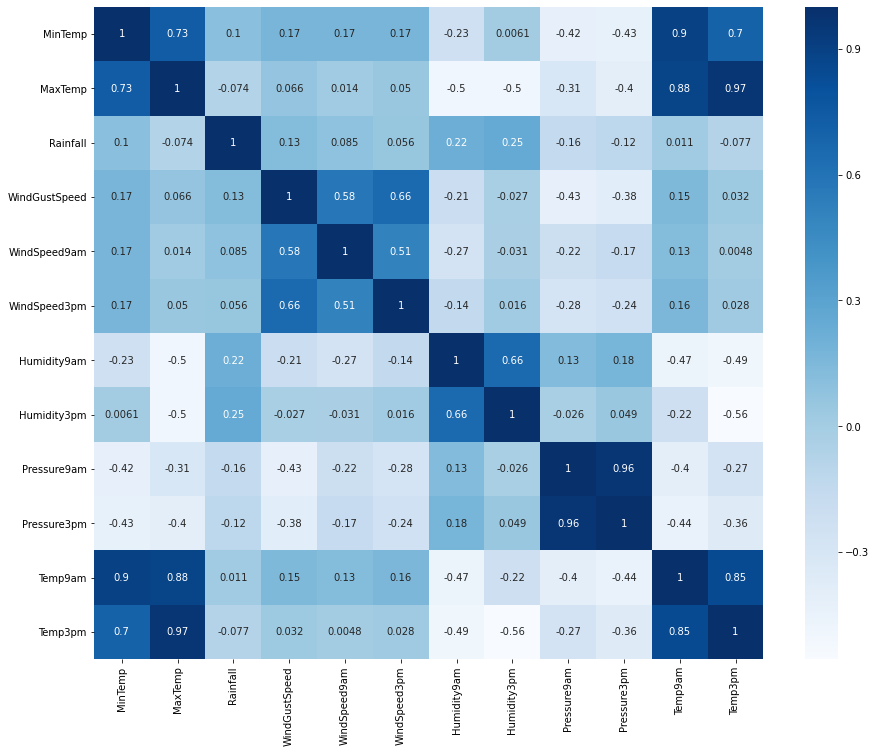

In [22]:
# Plotting correlation matrix

corr = rain_df.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr,cmap='Blues',annot=True)

- MaxTemp and Temp3pm have a strong positive correlation of 0.97.
- Pressure9am and Pressure3pm have a strong positive correlation of 0.96.
- MinTemp and Temp9am have a strong positive correlation of 0.90.
- MaxTemp and Temp9am have a strong positive correlation of 0.88.
- Temp9am and Temp3pm have a strong positive correlation of 0.85.
- Humidity and Temperature attributes have a negative correlation of 0.50.

In [23]:
# Adding year,month,Rainfall to rain_df
rain_df['year'] = pd.to_datetime(rain_df.Date).dt.year
rain_df['month'] = pd.to_datetime(rain_df.Date).dt.month

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

<Figure size 576x288 with 0 Axes>

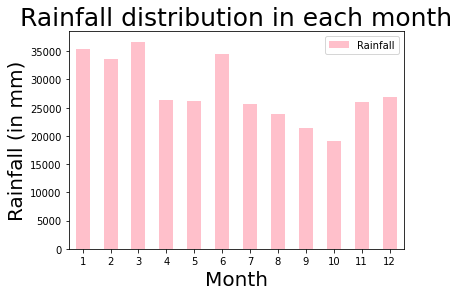

In [24]:
plt.figure(figsize=(8,4))
a = rain_df.groupby('month').agg({'Rainfall':'sum'})
a.plot(kind='bar', color='pink')
plt.title('Rainfall distribution in each month', fontsize=25)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Rainfall (in mm)', fontsize=20)
plt.xticks(rotation=0)

Text(0, 0.5, 'RainTomorrow')

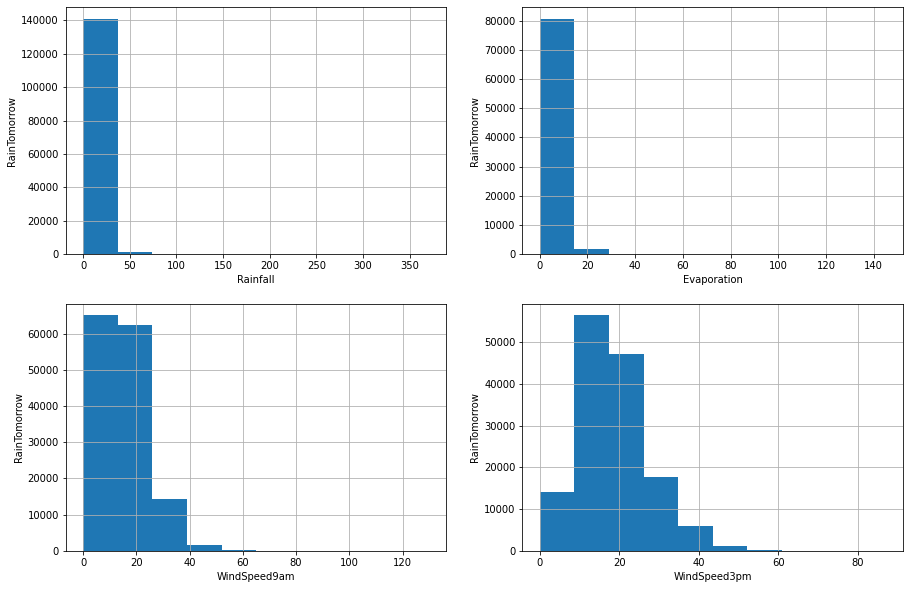

In [25]:
# plot histogram to check distribution

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 2)
fig = df.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 3)
fig = df.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 4)
fig = df.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

Text(0, 0.5, 'WindSpeed3pm')

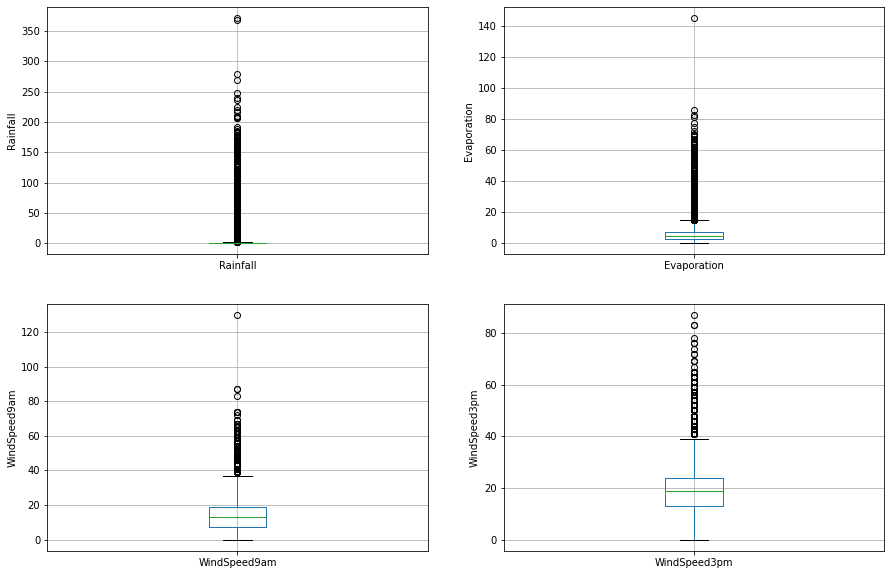

In [26]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

<a id='4'></a>
## 4. Train-test split 
Back to [Table of Contents](#TOC)

In [27]:
X = df.drop(['RainTomorrow'], axis=1)

y = df['RainTomorrow']

In [28]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [29]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((116368, 22), (29092, 22))

In [30]:
# Impementing the functions
df = replace_numerical(df)
df = replace_object(df)

In [31]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [32]:
df = df.drop(['RainTomorrow'], axis=1)

In [33]:
categorical = [var for var in df.columns if df[var].dtype=='O']
X_train[categorical].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
22926,NorfolkIsland,ESE,ESE,ESE,No
80735,Watsonia,NE,NNW,NNE,No
121764,Perth,SW,NaN,SW,Yes
139821,Darwin,ESE,ESE,E,No
1867,Albury,E,ESE,E,Yes


In [35]:
# encode RainToday variable

import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['RainToday'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [36]:
X_train.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1
22926,2014-03-12,NorfolkIsland,18.8,23.7,0.2,5.0,7.3,ESE,52.0,ESE,ESE,31.0,28.0,74.0,73.0,1016.6,1013.9,5.0,7.0,21.4,22.2,0,1
80735,2016-10-06,Watsonia,9.3,24.0,0.2,1.6,10.9,NE,48.0,NNW,NNE,13.0,24.0,74.0,55.0,1018.3,1014.6,3.0,5.0,14.3,23.2,0,1
121764,2011-08-31,Perth,10.9,22.2,1.4,1.2,9.6,SW,26.0,NaN,SW,0.0,11.0,85.0,47.0,1017.6,1014.9,1.0,2.0,16.6,21.5,1,0
139821,2010-06-11,Darwin,19.3,29.9,0.0,9.2,11.0,ESE,43.0,ESE,E,26.0,17.0,44.0,37.0,1015.9,1012.1,1.0,1.0,23.2,29.1,0,1
1867,2014-04-10,Albury,15.7,17.6,12.4,NaN,NaN,E,20.0,ESE,E,11.0,13.0,100.0,100.0,1015.2,1010.5,8.0,8.0,16.5,17.3,1,0


We can see that two additional variables RainToday_0 and RainToday_1 are created from RainToday variable.

Now, I will create the X_train training set.

In [37]:
X_train = pd.concat([X_train[numerical], X_train[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_train.Location), 
                     pd.get_dummies(X_train.WindGustDir),
                     pd.get_dummies(X_train.WindDir9am),
                     pd.get_dummies(X_train.WindDir3pm)], axis=1)

In [38]:
X_train.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,Adelaide,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,MelbourneAirport,Mildura,Moree,MountGambier,MountGinini,Newcastle,Nhil,NorahHead,NorfolkIsland,Nuriootpa,PearceRAAF,Penrith,Perth,PerthAirport,Portland,Richmond,Sale,SalmonGums,Sydney,SydneyAirport,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
22926,2014-03-12,18.8,23.7,0.2,5.0,7.3,52.0,31.0,28.0,74.0,73.0,1016.6,1013.9,5.0,7.0,21.4,22.2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
80735,2016-10-06,9.3,24.0,0.2,1.6,10.9,48.0,13.0,24.0,74.0,55.0,1018.3,1014.6,3.0,5.0,14.3,23.2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
121764,2011-08-31,10.9,22.2,1.4,1.2,9.6,26.0,0.0,11.0,85.0,47.0,1017.6,1014.9,1.0,2.0,16.6,21.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
139821,2010-06-11,19.3,29.9,0.0,9.2,11.0,43.0,26.0,17.0,44.0,37.0,1015.9,1012.1,1.0,1.0,23.2,29.1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1867,2014-04-10,15.7,17.6,12.4,NaN,NaN,20.0,11.0,13.0,100.0,100.0,1015.2,1010.5,8.0,8.0,16.5,17.3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##### We will now do the same thing for X_test

In [40]:
X_test = pd.concat([X_test[numerical], X_test[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_test.Location), 
                     pd.get_dummies(X_test.WindGustDir),
                     pd.get_dummies(X_test.WindDir9am),
                     pd.get_dummies(X_test.WindDir3pm)], axis=1)

<a id='5'></a>
## 5. Feature Scaling & Normalization
Back to [Table of Contents](#TOC)

In [144]:
data = ausRain.copy(deep=True)

In [145]:
# Breaking down date column to Year, Month and Date

data['Date'] = pd.to_datetime(data['Date']) # parse as datatime

data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

data[['Date', 'Year', 'Month', 'Day']] # preview changes made

data.drop('Date', axis=1, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
Location         145460 non-null object
MinTemp          143975 non-null float64
MaxTemp          144199 non-null float64
Rainfall         142199 non-null float64
Evaporation      82670 non-null float64
Sunshine         75625 non-null float64
WindGustDir      135134 non-null object
WindGustSpeed    135197 non-null float64
WindDir9am       134894 non-null object
WindDir3pm       141232 non-null object
WindSpeed9am     143693 non-null float64
WindSpeed3pm     142398 non-null float64
Humidity9am      142806 non-null float64
Humidity3pm      140953 non-null float64
Pressure9am      130395 non-null float64
Pressure3pm      130432 non-null float64
Cloud9am         89572 non-null float64
Cloud3pm         86102 non-null float64
Temp9am          143693 non-null float64
Temp3pm          141851 non-null float64
RainToday        142199 non-null object
RainTomorrow     145460 non-null obje

In [146]:
# One Hot Encoding (Preview) for Location column
pd.get_dummies(data.Location, drop_first=True).head() # 'drop first' means that we drop the first value if everything else is 0

,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,MelbourneAirport,Mildura,Moree,MountGambier,MountGinini,Newcastle,Nhil,NorahHead,NorfolkIsland,Nuriootpa,PearceRAAF,Penrith,Perth,PerthAirport,Portland,Richmond,Sale,SalmonGums,Sydney,SydneyAirport,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


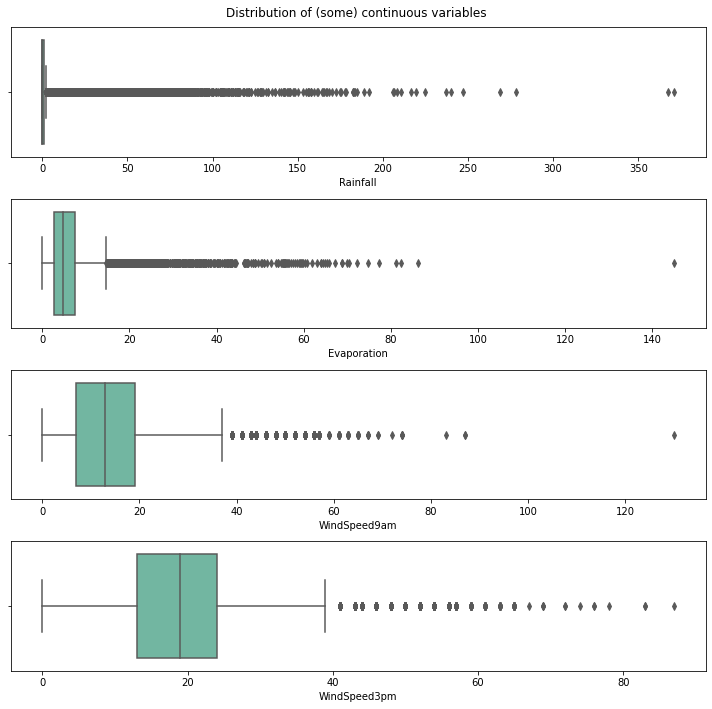

In [147]:
fig, axes = plt.subplots(4,1, figsize=(10, 10), sharey=False)
fig.suptitle('Distribution of (some) continuous variables')

# Rainfall
sns.boxplot(x= 'Rainfall', data = data, palette = 'Set2', ax = axes[0])
axes[0].set_title("")

# Evaporation
sns.boxplot(x= 'Evaporation', data = data, palette = 'Set2', ax = axes[1])
axes[1].set_title("")

# Windspeed (9AM)
sns.boxplot(x= 'WindSpeed9am', data = data, palette = 'Set2', ax = axes[2])
axes[2].set_title("")

# Windspeed (3PM)
sns.boxplot(x= 'WindSpeed3pm', data = data, palette = 'Set2', ax = axes[3])
axes[3].set_title("")

plt.tight_layout()

In [148]:
from sklearn.model_selection import train_test_split

X = data.drop(['RainTomorrow'], axis = 1)
y = data['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(f"The training sets have the following shapes: {X_train.shape, y_train.shape}")
print(f"The testing sets have the following shapes: {X_test.shape, y_test.shape}")

The training sets have the following shapes: ((116368, 24), (116368,))
The testing sets have the following shapes: ((29092, 24), (29092,))


In [149]:
# Listing out categorical columns and their missing values
# This doesn't include 'Year', 'Month', and 'Day' because they're integers

categorical_cols = list(X_train.select_dtypes(include=['object']).columns)
X_train[categorical_cols].isna().sum()

Location          0
WindGustDir    8270
WindDir9am     8448
WindDir3pm     3369
RainToday      2617
dtype: int64

In [150]:
# Filling in missing values in X_train with the mode.
for i in categorical_cols:
    X_train[i].fillna(X_train[i].mode()[0], inplace=True)
    X_test[i].fillna(X_test[i].mode()[0], inplace=True)
    
# Checking missing values in X_train
X_train[categorical_cols].isna().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [151]:
# Encoding categorical variables
import category_encoders as ce

onehotencoder = ce.BinaryEncoder(cols=['RainToday'])
X_train = onehotencoder.fit_transform(X_train)
X_test = onehotencoder.fit_transform(X_test)

X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,Year,Month,Day
22926,NorfolkIsland,18.8,23.7,0.2,5.0,7.3,ESE,52.0,ESE,ESE,31.0,28.0,74.0,73.0,1016.6,1013.9,5.0,7.0,21.4,22.2,0,1,2014,12,3
80735,Watsonia,9.3,24.0,0.2,1.6,10.9,NE,48.0,NNW,NNE,13.0,24.0,74.0,55.0,1018.3,1014.6,3.0,5.0,14.3,23.2,0,1,2016,6,10
121764,Perth,10.9,22.2,1.4,1.2,9.6,SW,26.0,N,SW,0.0,11.0,85.0,47.0,1017.6,1014.9,1.0,2.0,16.6,21.5,1,0,2011,8,31
139821,Darwin,19.3,29.9,0.0,9.2,11.0,ESE,43.0,ESE,E,26.0,17.0,44.0,37.0,1015.9,1012.1,1.0,1.0,23.2,29.1,0,1,2010,11,6
1867,Albury,15.7,17.6,12.4,NaN,NaN,E,20.0,ESE,E,11.0,13.0,100.0,100.0,1015.2,1010.5,8.0,8.0,16.5,17.3,1,0,2014,10,4


##### Feature Engineering

In [152]:
continuous_cols = list(X_train.select_dtypes(include=['float64']).columns)
X_train[continuous_cols].isna().sum()

MinTemp           1183
MaxTemp           1019
Rainfall          2617
Evaporation      50355
Sunshine         55899
WindGustSpeed     8218
WindSpeed9am      1409
WindSpeed3pm      2456
Humidity9am       2147
Humidity3pm       3598
Pressure9am      12091
Pressure3pm      12064
Cloud9am         44796
Cloud3pm         47557
Temp9am           1415
Temp3pm           2865
dtype: int64

In [153]:
# Fill in missing values with median

for column in continuous_cols:
    X_train[column].fillna(X_train[column].median(), inplace = True)
    X_test[column].fillna(X_test[column].median(), inplace = True)
    
# Checking missing values 
X_train.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday_0      0
RainToday_1      0
Year             0
Month            0
Day              0
dtype: int64

In [154]:
# Checking missing values 
X_test.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday_0      0
RainToday_1      0
Year             0
Month            0
Day              0
dtype: int64

In [155]:
# Include the other columns that are to be encoded (outlined above)

X_train = pd.concat([X_train[continuous_cols], X_train[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_train.Location), 
                     pd.get_dummies(X_train.WindGustDir, prefix = 'WGD'),
                     pd.get_dummies(X_train.WindDir9am, prefix = 'WD9am'),
                     pd.get_dummies(X_train.WindDir3pm, prefix = 'WD3pm')], axis=1)

X_test = pd.concat([X_test[continuous_cols], X_test[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_test.Location), 
                     pd.get_dummies(X_test.WindGustDir, prefix = 'WGD'),
                     pd.get_dummies(X_test.WindDir9am, prefix = 'WD9am'),
                     pd.get_dummies(X_test.WindDir3pm, prefix = 'WD3pm')], axis=1)

##### Scaling

In [156]:
# Scaling using MinMax Scaler
from sklearn.preprocessing import MinMaxScaler

cols = list(X_train.columns)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=[cols])

X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns=[cols])

X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,Adelaide,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,MelbourneAirport,Mildura,Moree,MountGambier,MountGinini,Newcastle,Nhil,NorahHead,NorfolkIsland,Nuriootpa,PearceRAAF,Penrith,Perth,PerthAirport,Portland,Richmond,Sale,SalmonGums,Sydney,SydneyAirport,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera,WGD_E,WGD_ENE,WGD_ESE,WGD_N,WGD_NE,WGD_NNE,WGD_NNW,WGD_NW,WGD_S,WGD_SE,WGD_SSE,WGD_SSW,WGD_SW,WGD_W,WGD_WNW,WGD_WSW,WD9am_E,WD9am_ENE,WD9am_ESE,WD9am_N,WD9am_NE,WD9am_NNE,WD9am_NNW,WD9am_NW,WD9am_S,WD9am_SE,WD9am_SSE,WD9am_SSW,WD9am_SW,WD9am_W,WD9am_WNW,WD9am_WSW,WD3pm_E,WD3pm_ENE,WD3pm_ESE,WD3pm_N,WD3pm_NE,WD3pm_NNE,WD3pm_NNW,WD3pm_NW,WD3pm_S,WD3pm_SE,WD3pm_SSE,WD3pm_SSW,WD3pm_SW,WD3pm_W,WD3pm_WNW,WD3pm_WSW
count,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.00000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000
mean,0.512133,0.529359,0.006314,0.035390,0.550516,0.263427,0.107952,0.225197,0.689507,0.516058,0.613882,0.610319,0.518232,0.588841,0.510115,0.519332,0.219648,0.780352,0.021527,0.020925,0.020908,0.020882,0.020856,0.020616,0.021252,0.021561,0.021071,0.023649,0.020409,0.020770,0.020676,0.021853,0.020908,0.022300,0.010338,0.021011,0.022231,0.020684,0.020452,0.020951,0.020813,0.021226,0.020822,0.010991,0.020641,0.020882,0.020375,0.020693,0.020873,0.021810,0.020684,0.020427,0.020856,0.020616,0.020659,0.022549,0.020865,0.021346,0.021131,0.01069,0.020813,0.020641,0.020470,0.020977,0.020693,0.021054,0.020573,0.062586,0.055711,0.050607,0.064176,0.049739,0.044815,0.045451,0.055557,0.062766,0.064769,0.063574,0.060352,0.062320,0.138397,0.056966,0.062216,0.062938,0.053322,0.052102,0.153771,0.053296,0.055342,0.055213,0.059836,0.059776,0.064408,0.062440,0.052635,0.057988,0.058117,0.050564,0.048252,0.057481,0.054285,0.058427,0.061340,0.057103,0.045339,0.054078,0.059123,0.068447,0.103723,0.065224,0.056055,0.064786,0.069323,0.060309,0.064958
std,0.157596,0.133940,0.023000,0.021999,0.190458,0.101767,0.068160,0.105065,0.188114,0.204400,0.111210,0.106584,0.253410,0.263255,0.136068,0.131445,0.414010,0.414010,0.145132,0.143134,0.143076,0.142990,0.142904,0.142094,0.144222,0.145245,0.143622,0.151954,0.141397,0.1

<a id='6'></a>
## 6. Model Building 
Back to [Table of Contents](#TOC)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initiatlize the model
logreg = LogisticRegression(solver='liblinear', random_state = 0)

# Fit the model
logreg.fit(X_train, y_train)

# Predict data points 
y_pred_test = logreg.predict(X_test)

# Print accuracy scores
print(f'Model accuracy score: {round(accuracy_score(y_test, y_pred_test) * 100, 2)}%')

<a id='7'></a>
## 7.  Evaluation of Model
Back to [Table of Contents](#TOC)

In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initiatlize the model
logreg = LogisticRegression(solver='liblinear', random_state = 0)

# Fit the model
logreg.fit(X_train, y_train)

# Predict data points 
y_pred_test = logreg.predict(X_test)

# Print accuracy scores
print(f'Model accuracy score: {round(accuracy_score(y_test, y_pred_test) * 100, 2)}%')

Model accuracy score: 83.9%


In [159]:
# Additional Metrics

print(f'Training set score: {round(logreg.score(X_train, y_train) * 100, 2)}%')
print(f'Test set score: {round(logreg.score(X_test, y_test) * 100, 2)}%')

# Calculating null accuracy
null_accuracy = (y_test.value_counts()[0]/(y_test.value_counts()[0]+y_test.value_counts()[1]))
print(f'Null Accuracy score: {round(null_accuracy * 100, 2)}%')

Training set score: 84.87%
Test set score: 83.9%
Null Accuracy score: 78.12%


Well, that's it for logistic regression. Please feel free to reach out in case you get stuck anywhere!

Author: Anish Mahapatra <br>
LinkedIn: [https://www.linkedin.com/in/anishmahapatra/](https://www.linkedin.com/in/anishmahapatra/) <br>
Email: anishmahapatra01@gmail.com